In [ ]:
%load_ext autoreload
%autoreload 2

In [5]:
from eq import *

# Posterior Belief Distortion

Pure Bayesian updating in this model causes the posterior belief after a rejection to be:

$$
\pi(\mu) = a_H - \frac{(a_H - \mu)(1 - x a_L)}{1 - x \mu}
$$

We add a simple linear term with a new parameter, epsilon, which we calibrate so that the we can replicate the two groups in our experiment, one switching earlier (after one "batch" of rejections) to a lower submarket, than the other: 

$$
\pi(\mu) = a_H - \frac{(a_H - \mu)(1 - x a_L)}{1 - x \mu} - (\mu - a_L) \epsilon
$$

In [18]:
foo = Equilibrium(1, .05, .11, .05, .025, delta = .007, sigma = .1, r = .04, B=.7, precision = .01, distortion = 0.12)
_ = foo.equilibrium(10)

bar = Equilibrium(1, .05, .11, .05, .025, delta = .007, sigma = .1, r = .04, B=.7, precision = .01, distortion = 0.35)
_ = bar.equilibrium(10)

# Employment Stats

Note we have very high unemployment (>40%), but the stats are similar between the two groups (high vs. low distortion)

In [19]:
foo.belief_tree.get_amounts('employed'), foo.belief_tree.get_amounts('unemployed')

(array([ 0.10100137,  0.43309056]), array([ 0.2810513 ,  0.06597987]))

In [20]:
bar.belief_tree.get_amounts('employed'), bar.belief_tree.get_amounts('unemployed')

(array([ 0.10137775,  0.43318555]), array([ 0.28082217,  0.06581343]))

# Wage Distributions

Note: higher "x" indicates a submarket with lower wages.

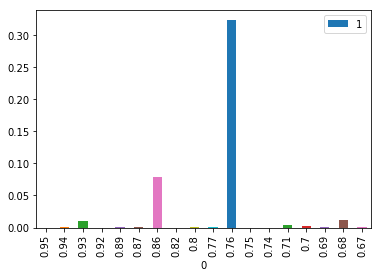

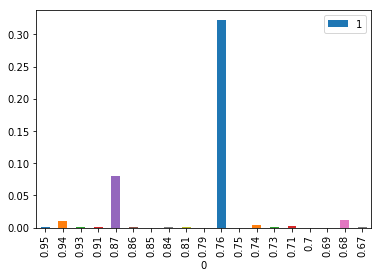

In [21]:
foo.plot_wages('H')
bar.plot_wages('H')

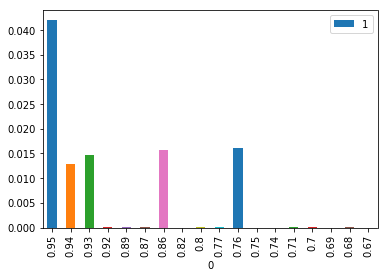

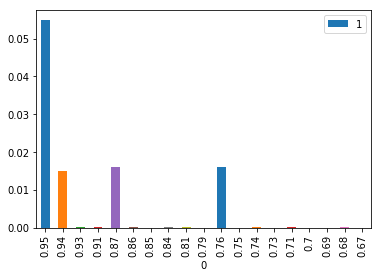

In [22]:
foo.plot_wages('L')
bar.plot_wages('L')

In [ ]:
foo.belief_tree

In [73]:
bar.belief_tree

|--m: 0.53, u: 0.1000, e: 0.0000 
   |--m: 0.10, u: 0.0541, e: 0.0000 
      |--m: 0.04, u: 0.0379, e: 0.0000 
         |--m: 0.05, u: 0.0319, e: 0.0000 
            |--m: 0.05, u: 0.0273, e: 0.0000 
               |--m: 0.05, u: 0.0234, e: 0.0000 
                  |--m: 0.05, u: 0.0201, e: 0.0000 
                     |--m: 0.05, u: 0.0172, e: 0.0000 
                        |--m: 0.05, u: 0.0148, e: 0.0000 
                           |--m: 0.05, u: 0.0127, e: 0.0000 
                           |--m: 0.05, u: 0.0000, e: 0.0059 
                        |--m: 0.05, u: 0.0000, e: 0.0069 
                           |--m: 0.05, u: 0.0000, e: 0.0000 
                     |--m: 0.05, u: 0.0001, e: 0.0081 
                        |--m: 0.05, u: 0.0000, e: 0.0000 
                           |--m: 0.05, u: 0.0000, e: 0.0000 
                  |--m: 0.05, u: 0.0001, e: 0.0094 
                     |--m: 0.05, u: 0.0001, e: 0.0000 
                        |--m: 0.05, u: 0.0000, e: 0.0000 
      